## **Association Sprint Challenge**


The journey into Association, a form of Unsupervised Machine Learning exposed you to the concepts of:

a) Market Basket Analysis 

b) Collaborative Filtering (including Matrix Factorization)

The purpose of this Sprint Challenge is to solidify your understanding of the Association Rule Learning topics covered this week by providing additional practice.

In this Sprint Challenge, we are going to use a few different data sets:

**Store Transactions data set**: https://www.dropbox.com/s/v3wdo3nzl41vxcd/Store_Transactions.csv?raw=1

**Movies data set**: https://www.dropbox.com/s/qo7v9k5rcwt7wgh/movies.csv?raw=1

**User Movie Ratings data set**: https://www.dropbox.com/s/piypmzeucyz160l/ratings_small.csv?raw=1

**Some Tips**:

1) You *may* need to prepare the data.

2) You will have to transpose the data set so that you get a proper representation of the underlying data set that can be feed into the Apriori Algorithm

Create solutions for the following code blocks. This exercise should take ~ 1.5 - 2 hours.

Share with mlsubmissions@lambdaschool.com when finished.


In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from scipy.spatial.distance import pdist, squareform

In [2]:
#Install the MLxtend package

!pip install MLxtend

    100% |████████████████████████████████| 1.3MB 6.8MB/s 


In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.preprocessing import TransactionEncoder

### Identifying Frequent Itemsets and Association Rules

**Dataset:**

Store Transactions: https://www.dropbox.com/s/v3wdo3nzl41vxcd/Store_Transactions.csv?raw=1

In [0]:
transactions = pd.read_csv('https://www.dropbox.com/s/v3wdo3nzl41vxcd/Store_Transactions.csv?raw=1')

In [5]:
print(transactions.shape)
print(transactions.isnull().any())
transactions.head()

(2328, 4)
Rowid             False
Transaction_id    False
Product_id        False
Quantity          False
dtype: bool


,Rowid,Transaction_id,Product_id,Quantity
0,1,370,154,3
1,2,41,40,3
2,3,109,173,3
3,4,556,11,4
4,5,143,72,1


In [6]:
transactions_per_row = transactions.pivot_table(
    index='Transaction_id', columns='Product_id', values='Quantity',
    aggfunc='sum', fill_value=0
    )

display(transactions_per_row.head())

purchase_sets = transactions_per_row.applymap(
    lambda quantity: 1 if quantity >= 1 else 0)
purchase_sets.head()

Product_id,1,2,3,4,5,6,7,8,9,10,...,169,170,171,172,173,174,175,176,177,178
Transaction_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,3,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Product_id,1,2,3,4,5,6,7,8,9,10,...,169,170,171,172,173,174,175,176,177,178
Transaction_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**1:** Utilize the Apriori Algorithm to uncover frequent itemsets

In [7]:
apriori(purchase_sets, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.030664,[1]
1,0.032368,[17]
2,0.030664,[24]
3,0.034072,[34]
4,0.032368,[41]
5,0.035775,[42]
6,0.030664,[43]
7,0.030664,[66]
8,0.032368,[67]
9,0.032368,[79]


Manually checking some of the results of the algorithm:

In [8]:
print(purchase_sets[purchase_sets[1] == 1].shape[0] / purchase_sets.shape[0])
print(purchase_sets[purchase_sets[17] == 1].shape[0] / purchase_sets.shape[0])

0.030664395229982964
0.03236797274275979


**2:** Discover the strongest association rules that have high lift and high confidence

In [9]:
frequent_itemsets = apriori(purchase_sets, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.25)
rules = rules[rules['lift'] > 1.2]
rules.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(8),(154),0.020443,0.023850,0.005111,0.250000,10.482143,0.004623,1.301533
1,(9),(153),0.020443,0.028961,0.005111,0.250000,8.632353,0.004519,1.294719
2,(15),(136),0.018739,0.028961,0.005111,0.272727,9.417112,0.004568,1.335179
3,(18),(151),0.025554,0.028961,0.006814,0.266667,9.207843,0.006074,1.324144
4,(35),(176),0.018739,0.027257,0.005111,0.272727,10.005682,0.004600,1.337521


I had to lower both the confidence threshold and the minimum support for the Apriori algorithm to discover the above association rules. While many have high lift, they have low confidence and support, implying that the items do not have many total instances of being purchased, and out of this small amount, were bought together at least once.

**3:**  Create a Summary Table or Directed Graph to surface the association rules identified in **Ask 2** above

In [0]:
DG = nx.MultiDiGraph()
edges = [(set(rules.iloc[ix]['antecedants']).pop(), 
          set(rules.iloc[ix]['consequents']).pop(), 
          rules.iloc[ix]['lift']) for ix in range(rules.shape[0])]
DG.add_weighted_edges_from(edges)

In [0]:
lifts = [rules.iloc[ix]['lift'] / 10 for ix in range(rules.shape[0])]

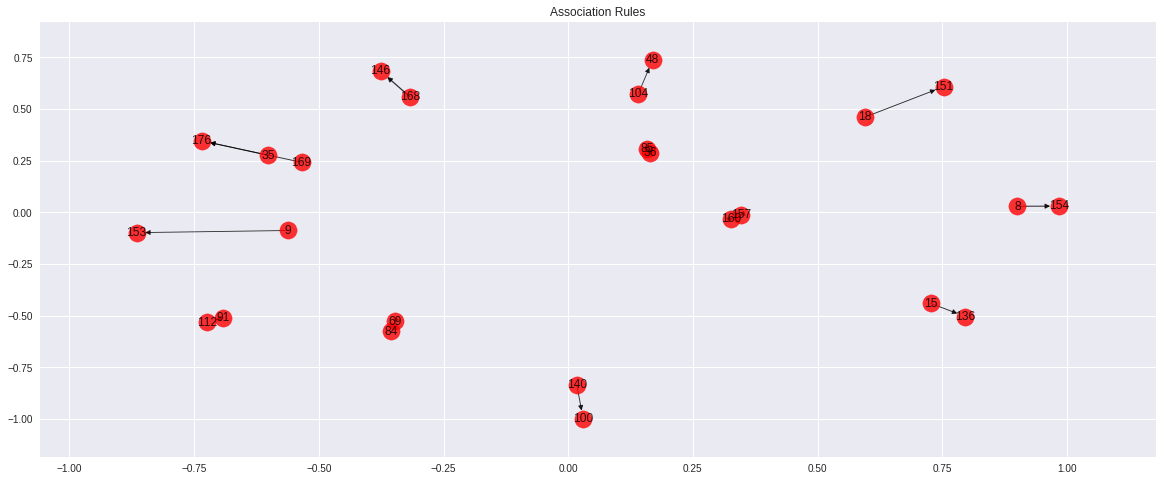

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))

nx.draw_networkx(DG, with_labels=True, ax=ax, alpha=0.8, width=lifts)
ax.set(title='Association Rules');

As suspected, most of the association rules found are just between pairs or triplets of items, indicative of having two infrequently bought items that happened to be bought together. These association rules should not be taken to confidently represent consumer behavior, but rather may be artifacts of the variannce due to the data being a sample.

### Collaborative Filtering

Dataset:


*Movies*: https://www.dropbox.com/s/qo7v9k5rcwt7wgh/movies.csv?raw=1

*User Movie Ratings*: https://www.dropbox.com/s/4ec9l887mth6rep/movie_ratings.csv?raw=1

In [0]:
movies = pd.read_csv('https://www.dropbox.com/s/qo7v9k5rcwt7wgh/movies.csv?raw=1')
ratings = pd.read_csv('https://www.dropbox.com/s/4ec9l887mth6rep/movie_ratings.csv?raw=1')

In [23]:
print(movies.isnull().any())
print(ratings.isnull().any())

display(movies.head())
display(ratings.head())

movieId    False
title      False
genres     False
dtype: bool
userid     False
movieid    False
rating     False
dtype: bool


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userid,movieid,rating
0,1,28,4
1,1,26,4
2,1,9,4
3,1,1,4
4,1,14,4


As demonstrated in class, I will encapsulate my data and filtering methods in a class.

In [0]:
class CollaborativeFiltering(object):
    def __init__(self, movies, ratings):
        self.movies = movies
        self.raings = ratings
        
        self.pivot = pd.pivot_table(ratings, 
                                    index='userid', 
                                    columns='movieid', 
                                    aggfunc=np.max).fillna(0)
        
    def matrix_factorization(self, K=2, steps=5000, alpha=0.0002, beta=0.02):
        """
        R     : a matrix to be factorized, dimension N x M
        P     : an initial matrix of dimension N x K
        Q     : an initial matrix of dimension M x K
        K     : the number of latent features
        steps : the maximum number of steps to perform the optimization
        alpha : the learning rate
        beta  : the regularization parameter  
        """
        R = self.pivot.as_matrix()
        N = len(R)
        M = len(R[0])
        P = np.random.rand(N,K) # Matrix of user attributes
        Q = np.random.rand(M,K) # Matrix of movie attributes
        
        Q = Q.T
        for step in range(steps):
            for i in range(len(R)):
                for j in range(len(R[i])):
                    if R[i][j] > 0:
                        eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                        for k in range(K):
                            P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                            Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
            eR = np.dot(P,Q)
            e = 0
            for i in range(len(R)):
                for j in range(len(R[i])):
                    if R[i][j] > 0:
                        e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                        for k in range(K):
                            e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
            if e < 0.001:
                break
                
        self.nR = np.dot(P, Q)
        return P, Q
    
    def recommend_for_user(self, userId, n=5, names=True):
        """
        Generate movie recommendations for a user.
        Input: userId (from MovieLens data)
        Output: list of tuples (movieId, predictedRating) of top n movies recommended for user (not previously rated by them)
        """
        if not hasattr(self, 'nR'):
            print('factoring ratings matrix with default settings')
            self.matrix_factorization()
            
        ids = self.pivot.index
        iloc = np.where(ids==userId)[0]
        
        # sort by highest ratings, filtering out already watched films
        recommendation_ilocs = np.argsort(self.nR[iloc][self.pivot.iloc[iloc]==0])
        
        movie_ids = self.pivot.T.reset_index()['movieid']
        recommendation_ids = movie_ids[recommendation_ilocs][:n]

        if names:
            return [self.movies['title'][self.movies['movieId']==rec].values[0] 
                    for rec in recommendation_ids if rec in self.movies['movieId']]
        else:
            return recommendation_ids
    
    def most_similar(self, movieId, n=5, metric='correlation', names=True):
        if not hasattr(self, 'nR'):
            print('factoring ratings matrix with default settings')
            self.matrix_factorization()
        similarities = squareform(1-pdist(self.nR.T, metric))
        
        ids = self.pivot.T.reset_index()['movieid']
        iloc = np.where(ids==movieId)[0]
        
        recommendation_ilocs = np.argsort(similarities[iloc])[::-1][0]
        recommendation_ids = ids[recommendation_ilocs][ids!=movieId][:n]
        if names:
            return [self.movies['title'][self.movies['movieId']==rec].values[0]
                    for rec in recommendation_ids if rec in self.movies['movieId']]
        else:
            return recommendation_ids

Since there are a lot of entries in the data, I will develop and test my methods on a small subset, before running it on the whole thing.

In [0]:
dev_ratings = ratings.head(100)

In [90]:
movie_filter = CollaborativeFiltering(movies, dev_ratings)
movie_filter.recommend_for_user(1, 4)

factoring ratings matrix with default settings


['Assassins (1995)',
 'Powder (1995)',
 'Grumpier Old Men (1995)',
 'Now and Then (1995)']

In [91]:
print(movies.loc[10].values[1], '\n')
movie_filter.most_similar(28, 5)

American President, The (1995) 



['Get Shorty (1995)',
 'Babe (1995)',
 'Dangerous Minds (1995)',
 'Assassins (1995)',
 'Jumanji (1995)']

In [92]:
movie_filter.pivot

rating                                              ...             \
movieid     1    2    3    4    5    7    8    9    10   12 ...    23   24   
userid                                                      ...              
1          4.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0 ...   0.0  0.0   
2          5.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
3          4.0  4.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   3.0  0.0   
4          5.0  5.0  0.0  5.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  5.0   
5          5.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0 ...   0.0  0.0   
6          5.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
7          5.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  5.0 ...   5.0  0.0   
8          4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0 ...   3.0  0.0   
9          5.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
10         4.0  0.0  4.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0 ...   5.0  0.0   
11         5.0  4.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
12         5.0  0.0  5.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0 ...   5.0  0.0   
13         4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0 ...   3.0  0.0   
14         5.0  4.0  5.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  5.0   
15         5.0  0.0  5.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
16         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   

                                                 
movieid   26   27   28   29   31   32   33   34  
userid                                           
1        4.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  3.0  0.0  0.0  4.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        0.0  0.0  0.0  3.0  3.0  2.0  5.0  5.0  
6        0.0  0.0  0.0  0.0  2.0  5.0  4.0  3.0  
7        0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  
8        0.0  5.0  5.0  0.0  0.0  0.0  0.0  0.0  
9        0.0  0.0  5.0  4.0  0.0  0.0  0.0  0.0  
10       0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  
11       0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  
12       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15       0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  
16       0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  

[16 rows x 27 columns]

In [93]:
pivot = movie_filter.pivot.copy()
pivot[pivot==0] = movie_filter.nR
np.round(pivot, 1)

rating                                              ...             \
movieid     1    2    3    4    5    7    8    9    10   12 ...    23   24   
userid                                                      ...              
1          4.0  4.3  4.3  3.0  4.3  5.4  3.8  4.0  4.5  4.3 ...   4.1  4.0   
2          5.0  5.0  4.6  2.2  4.7  5.8  3.6  4.8  4.8  4.9 ...   4.9  4.0   
3          4.0  4.0  5.0  3.4  4.1  5.2  3.9  4.0  4.4  4.1 ...   3.0  3.9   
4          5.0  5.0  5.3  5.0  5.0  6.4  5.1  4.9  5.5  4.9 ...   4.3  5.0   
5          5.0  5.1  4.6  2.3  4.7  5.9  3.7  5.0  4.9  4.9 ...   4.9  4.1   
6          5.0  5.0  5.3  5.0  5.1  6.4  5.1  4.8  5.5  4.9 ...   4.2  5.1   
7          5.0  5.2  4.7  2.0  4.8  5.9  3.7  4.9  4.9  5.0 ...   5.0  4.1   
8          4.0  4.0  5.0  4.9  4.6  5.8  4.8  4.3  5.0  4.4 ...   3.0  4.7   
9          5.0  4.6  5.0  4.5  4.9  6.2  4.8  4.7  5.3  4.8 ...   4.3  4.8   
10         4.0  4.6  4.0  3.5  4.7  5.9  4.0  4.6  4.9  4.7 ...   5.0  4.4   
11         5.0  4.0  5.0  4.5  4.8  6.0  4.8  4.6  5.2  4.6 ...   4.1  4.7   
12         5.0  4.4  5.0  4.5  4.8  6.1  5.0  4.6  5.2  4.7 ...   5.0  4.8   
13         4.0  3.5  4.1  3.9  3.9  5.0  4.0  3.7  4.3  3.8 ...   3.0  3.9   
14         5.0  4.0  5.0  4.9  5.0  6.2  5.0  4.6  5.3  4.7 ...   4.0  5.0   
15         5.0  4.3  5.0  5.0  4.8  6.1  4.9  4.6  5.2  4.7 ...   4.0  4.9   
16         6.4  6.1  6.6  5.4  6.4  8.1  6.1  6.3  6.9  6.4 ...   5.7  6.2   

                                                 
movieid   26   27   28   29   31   32   33   34  
userid                                           
1        4.0  4.4  4.0  3.6  2.3  3.0  3.9  3.3  
2        4.5  4.6  4.0  3.8  3.0  2.5  4.4  4.0  
3        3.8  4.3  4.0  3.5  2.1  3.1  3.8  2.9  
4        4.5  5.5  5.2  4.4  2.3  4.3  4.6  3.3  
5        4.6  4.7  4.0  3.0  3.0  2.0  5.0  5.0  
6        4.5  5.5  5.3  4.4  2.0  5.0  4.0  3.0  
7        4.6  4.7  4.1  3.8  3.0  2.6  4.5  4.0  
8        4.0  5.0  5.0  4.0  1.9  4.2  4.1  2.6  
9        4.4  5.2  5.0  4.0  2.3  4.0  4.4  3.3  
10       4.3  4.8  4.4  5.0  2.5  3.3  4.3  3.5  
11       4.3  5.1  4.9  4.1  2.2  4.0  4.3  3.0  
12       4.3  5.2  4.9  4.1  2.2  4.0  4.3  3.1  
13       3.5  4.2  4.1  3.4  1.7  3.4  3.5  2.4  
14       4.3  5.3  5.1  4.2  2.1  4.3  4.3  2.9  
15       4.3  5.2  5.0  4.2  2.1  4.3  4.3  2.9  
16       5.9  6.8  6.3  5.5  3.2  5.0  5.9  4.5  

[16 rows x 27 columns]

**1:** Utilize Matrix Factorization to arrive at the 2 matrices i.e. a) User Ratings (across attributes) b) Movie Ratings (across attributes). Once you have the 2 matrices, compute the "dot" product of the 2 matrices to come up with an estimate/prediction for the missing user ratings

For this ask, you could leverage the Matrix Factorization step that was discussed in the lecture **OR**

Here is another implmentation for your reference that could be leveraged (may need to be adapted): 

https://lazyprogrammer.me/tutorial-on-collaborative-filtering-and-matrix-factorization-in-python/


In [94]:
movie_filter_full = CollaborativeFiltering(movies, ratings)
movie_filter_full.matrix_factorization()

predictions = movie_filter_full.pivot.copy()
predictions[predictions==0] = movie_filter_full.nR
predictions = np.round(predictions, 1)

print('Predicted User Raings:')
display(predictions)

Predicted User Raings:


rating                                              ...             \
movieid     1    2    3    4    5    6    7    8    9    10 ...    25   26   
userid                                                      ...              
1          4.0  3.8  4.2  4.6  4.4  4.3  3.1  4.1  4.0  4.4 ...   3.9  4.0   
2          5.0  5.0  4.8  4.2  4.9  4.6  4.5  4.7  4.6  4.7 ...   5.0  4.8   
3          4.0  4.0  5.0  5.8  4.9  5.1  2.7  4.5  4.9  5.0 ...   3.9  4.7   
4          5.0  5.0  5.0  5.0  5.0  5.0  4.3  4.9  5.0  5.1 ...   5.1  5.1   
5          5.0  4.5  4.7  4.7  4.8  4.6  3.9  4.6  5.0  4.7 ...   4.6  4.7   
6          5.0  5.0  4.6  3.8  4.7  4.3  4.5  4.5  4.4  4.5 ...   5.0  4.7   
7          5.0  5.2  4.3  2.0  4.4  3.7  5.5  4.4  3.9  4.1 ...   5.5  4.5   
8          4.0  4.1  5.0  6.0  5.1  5.2  2.9  4.7  5.0  5.0 ...   4.2  4.9   
9          5.0  4.9  5.0  5.0  5.2  5.0  4.3  5.0  5.0  5.1 ...   5.1  5.1   
10         4.0  4.3  4.0  5.3  5.0  5.0  3.5  4.0  4.9  5.0 ...   4.5  4.9   
11         5.0  4.0  5.0  6.2  5.1  5.3  2.8  4.7  5.1  5.2 ...   4.1  4.9   
12         5.0  5.2  5.0  4.1  5.1  4.7  5.0  5.0  4.8  4.9 ...   5.4  5.1   
13         4.0  4.3  4.2  3.8  4.3  4.0  5.0  4.2  4.1  4.2 ...   4.5  4.3   
14         5.0  4.0  5.0  5.6  5.0  5.2  3.5  4.8  5.0  5.2 ...   4.5  5.0   
15         5.0  4.5  5.0  5.0  5.0  4.9  3.9  4.8  4.9  5.0 ...   4.7  4.9   
16         4.0  4.1  4.0  5.3  4.8  4.9  3.2  4.0  4.8  4.9 ...   4.2  4.7   
17         4.0  4.0  4.0  4.1  5.0  4.1  3.6  4.1  4.1  4.2 ...   4.2  4.3   
18         5.0  4.9  5.0  5.0  5.2  5.0  4.4  5.0  5.0  5.2 ...   5.0  5.2   
19         4.9  5.0  5.1  5.4  5.2  5.0  3.9  5.0  5.0  5.2 ...   5.0  5.1   
20         5.0  5.0  4.9  4.3  5.0  4.7  4.7  4.8  4.7  4.9 ...   5.2  5.0   
21         3.3  4.0  3.1  2.1  3.0  2.7  3.5  3.0  2.8  2.9 ...   3.6  4.0   
22         4.4  4.0  4.3  3.5  4.4  4.0  4.0  4.2  4.0  4.2 ...   4.7  4.4   
23         4.5  4.0  4.7  5.2  4.9  4.9  3.4  4.6  4.8  4.9 ...   4.0  4.8   
24         5.3  5.0  5.3  4.8  5.0  5.1  4.8  5.2  5.1  5.0 ...   5.5  5.3   
25         4.8  5.0  4.0  4.1  4.8  4.5  4.6  4.7  4.6  5.0 ...   5.1  4.8   
26         5.1  5.0  5.1  4.8  5.0  5.0  4.5  5.0  5.0  5.0 ...   5.2  5.2   
27         5.1  5.0  5.0  4.3  5.0  4.7  4.8  4.9  4.8  4.9 ...   5.3  5.0   
28         5.1  5.0  5.2  5.2  5.3  5.2  4.3  5.1  5.2  5.3 ...   5.0  5.3   
29         5.1  5.0  5.1  4.9  5.0  5.0  4.4  5.0  5.0  5.1 ...   5.2  5.2   
30         4.1  3.9  5.0  4.8  5.0  4.5  3.1  4.2  4.4  5.0 ...   4.0  4.4   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...   
71         4.3  4.2  4.4  4.2  4.5  4.3  3.8  4.3  4.3  4.4 ...   5.0  4.4   
72         2.5  2.1  3.0  4.4  3.2  3.5  1.1  2.9  3.3  3.3 ...   2.1  3.0   
73         2.8  2.8  2.7  2.3  2.8  2.5  2.7  2.7  2.6  2.7 ...   2.9  2.8   
74         5.4  5.6  4.9  3.3  5.0  4.3  5.8  4.9  4.6  4.7 ...   5.9  5.1   
75         5.0  4.7  5.3  6.0  5.5  5.6  3.7  5.2  5.4  5.5 ...   4.9  5.4   
76         5.1  5.1  5.1  4.5  5.2  4.8  4.8  5.0  4.9  5.0 ...   5.4  5.2   
77         5.0  5.0  5.0  4.7  5.2  4.9  4.5  5.0  4.9  5.1 ...   5.2  5.1   
78         4.0  4.2  3.7  2.6  3.8  3.3  4.2  3.7  3.5  3.6 ...   4.4  3.8   
79         4.4  4.2  4.7  5.2  4.9  4.9  3.4  4.6  4.8  4.9 ...   4.4  4.8   
80         4.2  4.1  4.3  4.2  4.4  4.2  3.6  4.2  4.2  4.3 ...   4.3  4.3   
81         2.7  2.2  3.4  5.3  3.6  4.1  0.9  3.2  3.8  3.8 ...   2.2  3.4   
82         4.4  4.4  4.4  3.9  4.5  4.2  4.1  4.3  4.2  4.3 ...   4.6  4.0   
83         5.1  5.0  5.3  5.5  5.5  5.3  4.3  5.2  5.3  5.4 ...   5.2  5.4   
84         2.4  1.9  3.2  5.3  3.4  4.0  0.5  3.0  3.6  3.7 ...   1.8  3.2   
85         5.2  5.2  5.1  4.7  5.3  5.0  4.8  5.1  5.0  5.1 ...   5.4  5.2   
86         4.7  4.7  4.5  3.7  4.6  4.2  4.5  4.4  4.3  4.4 ...   4.9  4.6   
87         4.3  4.3  4.2  3.6  4.3  4.0  4.0  4.1  4.0  4.1 ...   4.5  4.3   
88         5.0  4.9  5.2  5.3 

**2:** Pick 2 Userid's from the underlying data set and surface recommendations for the Userid's you chose



In [95]:
users = [10, 42]

for user in users:
    recs = movie_filter_full.recommend_for_user(user)
    print('User: {}\nRecommendations: {}\n'.format(user, recs))

User: 10
Recommendations: ['Father of the Bride Part II (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Othello (1995)', 'Powder (1995)']

User: 42
Recommendations: ['Othello (1995)', 'Casino (1995)', 'Leaving Las Vegas (1995)', 'Sense and Sensibility (1995)', 'Nixon (1995)']



**3:** Pick 2 movies and find movies that are similar to the movies you have picked

In [96]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [101]:
movie_ids = [1, 10]

for movie in movie_ids:
    recs = movie_filter_full.most_similar(movie)
    print('Movie: {}\nRecommendations: {}\n'.format(movies[movies['movieId']==movie]['title'], recs))

Movie: 0    Toy Story (1995)
Name: title, dtype: object
Recommendations: ['Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Dangerous Minds (1995)', 'Sense and Sensibility (1995)', 'City of Lost Children, The (Cité des enfants perdus, La) (1995)', 'Four Rooms (1995)']

Movie: 9    GoldenEye (1995)
Name: title, dtype: object
Recommendations: ['Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Sabrina (1995)', 'Dangerous Minds (1995)', 'Assassins (1995)', 'Copycat (1995)']



Since the recommender is finding similar sets of movies that are "similar" to movies of different genres, this is probably just due to a small movie pool to begin with in the version of the data used for the sprint challenge. In such a case, movies that have been rated more may end up being more similar to more other movies than relatively unpopular movies that actually have similar content.

In [103]:
movie_filter_full.pivot

rating                                              ...             \
movieid     1    2    3    4    5    6    7    8    9    10 ...    25   26   
userid                                                      ...              
1          4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0 ...   0.0  4.0   
2          5.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
3          4.0  4.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4          5.0  5.0  0.0  5.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
5          5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0 ...   0.0  0.0   
6          5.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
7          5.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
8          4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0 ...   0.0  0.0   
9          5.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
10         4.0  0.0  4.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0 ...   0.0  0.0   
11         5.0  4.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
12         5.0  0.0  5.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0 ...   0.0  0.0   
13         4.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0 ...   0.0  0.0   
14         5.0  4.0  5.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
15         5.0  0.0  5.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
16         4.0  0.0  4.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0 ...   0.0  0.0   
17         4.0  4.0  4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
18         5.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   5.0  0.0   
19         0.0  5.0  0.0  0.0  0.0  5.0  0.0  0.0  5.0  0.0 ...   5.0  0.0   
20         0.0  5.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
21         0.0  4.0  0.0  0.0  3.0  0.0  0.0  3.0  0.0  0.0 ...   0.0  4.0   
22         0.0  4.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0 ...   0.0  0.0   
23         0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   4.0  0.0   
24         0.0  5.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  5.0 ...   0.0  0.0   
25         0.0  5.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0 ...   0.0  0.0   
26         0.0  5.0  0.0  0.0  5.0  5.0  0.0  5.0  0.0  5.0 ...   0.0  0.0   
27         0.0  5.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  5.0   
28         0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   5.0  0.0   
29         0.0  5.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
30         0.0  0.0  5.0  0.0  5.0  0.0  0.0  0.0  0.0  5.0 ...   0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...   
71         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   5.0  0.0   
72         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
73         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
74         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
75         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
76         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
77         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
78         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
79         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
80         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
81         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
82         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  4.0   
83         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
84         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
85         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
86         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
87         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
88         0.0  0.0  0.0  0.0 

**Strech goal 1**:  Measure Recommendation Accuracy - compute the RMSE RMSE to ascertain the difference between the user's actual movie ratings and the ratings that were predicted for the same movies.

*Hint*: You will need to split the underlying data set. 70% of the 'User Movie Ratings' data set will constitute the *Training* dataset and 30% of the 'User Movie Ratings' dataset will constitute the* Testing *data set 

**Stretch goal 2**: Publish the Collaborative Filtering process that you understook as a blog post. Some suggested topics to consider:


1) Matrix Factorization step - what is the purpose of performing Matrix Factorization?

2) Recommendation Accuracy - summarize your findings? 

3) The actual recommendations that were surfaced

*Include a link to your blog post in your submission*

